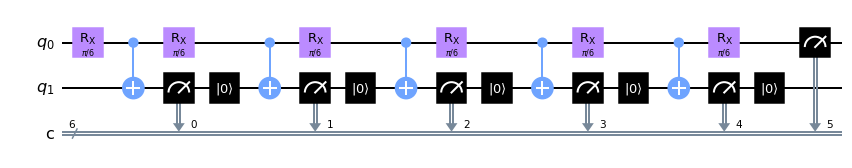

In [1]:
# Coding the Zeno bomb tester 

from qiskit.circuit import *
import numpy as np
from qiskit.circuit.library import RXGate
import matplotlib

cycles = 6 # Choose the number of times we want to pass our photon through the mystery box. The more, the better. 
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit 
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs 
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.    
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')